In [2]:
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path
import os
from failure_recognition.die_casting import PATH_DICT
plt.close("all")
from sklearn import tree
from sklearn.inspection import DecisionBoundaryDisplay
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\\bin'
import numpy as np
from itertools import permutations


In [3]:
os.chdir("c:/git/failure_recognition/failure-recognition-die-casting")
print(os.getcwd())

c:\git\failure_recognition\failure-recognition-die-casting


### Test Decision Tree

In [ ]:
X = [[1, 0.2], [1, 1], [0,0], [0, 1]]
X = np.array(X)
feat_labels = ["feat_a", "feat_b"]
class_labels = ["class_a", "class_b"]
Y = np.array([0, 1, 1, 0])
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

out = clf.predict([[3., 3.], [0., 0.], [5., 0.], [0., 5.]])
out_prob = clf.predict_proba([[3., 3.5], [0.5, 0.], [5.1, 0.], [0., 5.]])
tree.plot_tree(clf)

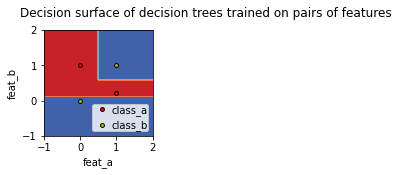

In [31]:
n_classes = 2
plot_colors = "ryb"
plot_step = 0.02
# Plot the decision boundary
ax = plt.subplot(2, 3, 0 + 1)
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.RdYlBu,
    response_method="predict",
    ax=ax,
    xlabel=(feat_labels[0]),
    ylabel=(feat_labels[1])
)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(Y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=color,
        label=class_labels[i],
        cmap=plt.cm.RdYlBu,
        edgecolor="black",
        s=15,
    )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

### Test Bue (Plot combinations of two features)


In [ ]:
bue_data = pd.read_csv(PATH_DICT["bue"], decimal=".", sep='\t', header=0)
Y_Fp = bue_data.iloc[:, -8:-7]
# Y = bue_data.iloc[:, -7:]
Yp = Y_Fp
Xp_all = bue_data.iloc[:, :-8]
perm = permutations(range(Xp_all.shape[1]), 2)
for pairidx, pair in enumerate(perm):
    pair = list(pair)
    Xp = Xp_all.iloc[:, pair]
    X = np.array(Xp)
    Y = np.array(Yp)
    Y_labels = pd.array(["Fehler_0", "Fehler_1"])
    clf = tree.DecisionTreeClassifier(max_depth=3)
    clf = clf.fit(X, Y)
    fig=plt.figure(figsize=(12,8), dpi=100, facecolor='w', edgecolor='k')
    n_classes = 2
    plot_colors = "ryb"
    plot_step = 0.02
    # Plot the decision boundary
    ax = plt.subplot(2, 3, 0 + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=(Xp.columns[0]),
        ylabel=(Xp.columns[1])
    )

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(Y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=Y_labels[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

    plt.suptitle("Test pair of two features")
    plt.legend(loc="lower left", borderpad=0, handletextpad=0)
    _ = plt.axis("tight")
    plt.show()
    break
    pass

### Test Bue (many features)

[Text(0.5, 0.875, 'Kavitaetsdruck_5nach_t_R0 <= 514.5\ngini = 0.363\nsamples = 7982\nvalue = [6081, 1901]'),
 Text(0.25, 0.625, 'Kavitaetsdruck_1nach_t_R0 <= 114.5\ngini = 0.496\nsamples = 1448\nvalue = [785, 663]'),
 Text(0.125, 0.375, 'Schliesskraft <= 7051.5\ngini = 0.464\nsamples = 421\nvalue = [154, 267]'),
 Text(0.0625, 0.125, 'gini = 0.298\nsamples = 165\nvalue = [30, 135]'),
 Text(0.1875, 0.125, 'gini = 0.5\nsamples = 256\nvalue = [124, 132]'),
 Text(0.375, 0.375, 'Temp11_Mittelwert <= 341.5\ngini = 0.474\nsamples = 1027\nvalue = [631, 396]'),
 Text(0.3125, 0.125, 'gini = 0.494\nsamples = 740\nvalue = [410, 330]'),
 Text(0.4375, 0.125, 'gini = 0.354\nsamples = 287\nvalue = [221, 66]'),
 Text(0.75, 0.625, 'Temp11_Mittelwert <= 411.5\ngini = 0.307\nsamples = 6534\nvalue = [5296, 1238]'),
 Text(0.625, 0.375, 'Zyklus_Nummer <= 7285.5\ngini = 0.286\nsamples = 6358\nvalue = [5261, 1097]'),
 Text(0.5625, 0.125, 'gini = 0.25\nsamples = 5795\nvalue = [4948, 847]'),
 Text(0.6875, 0.125, 

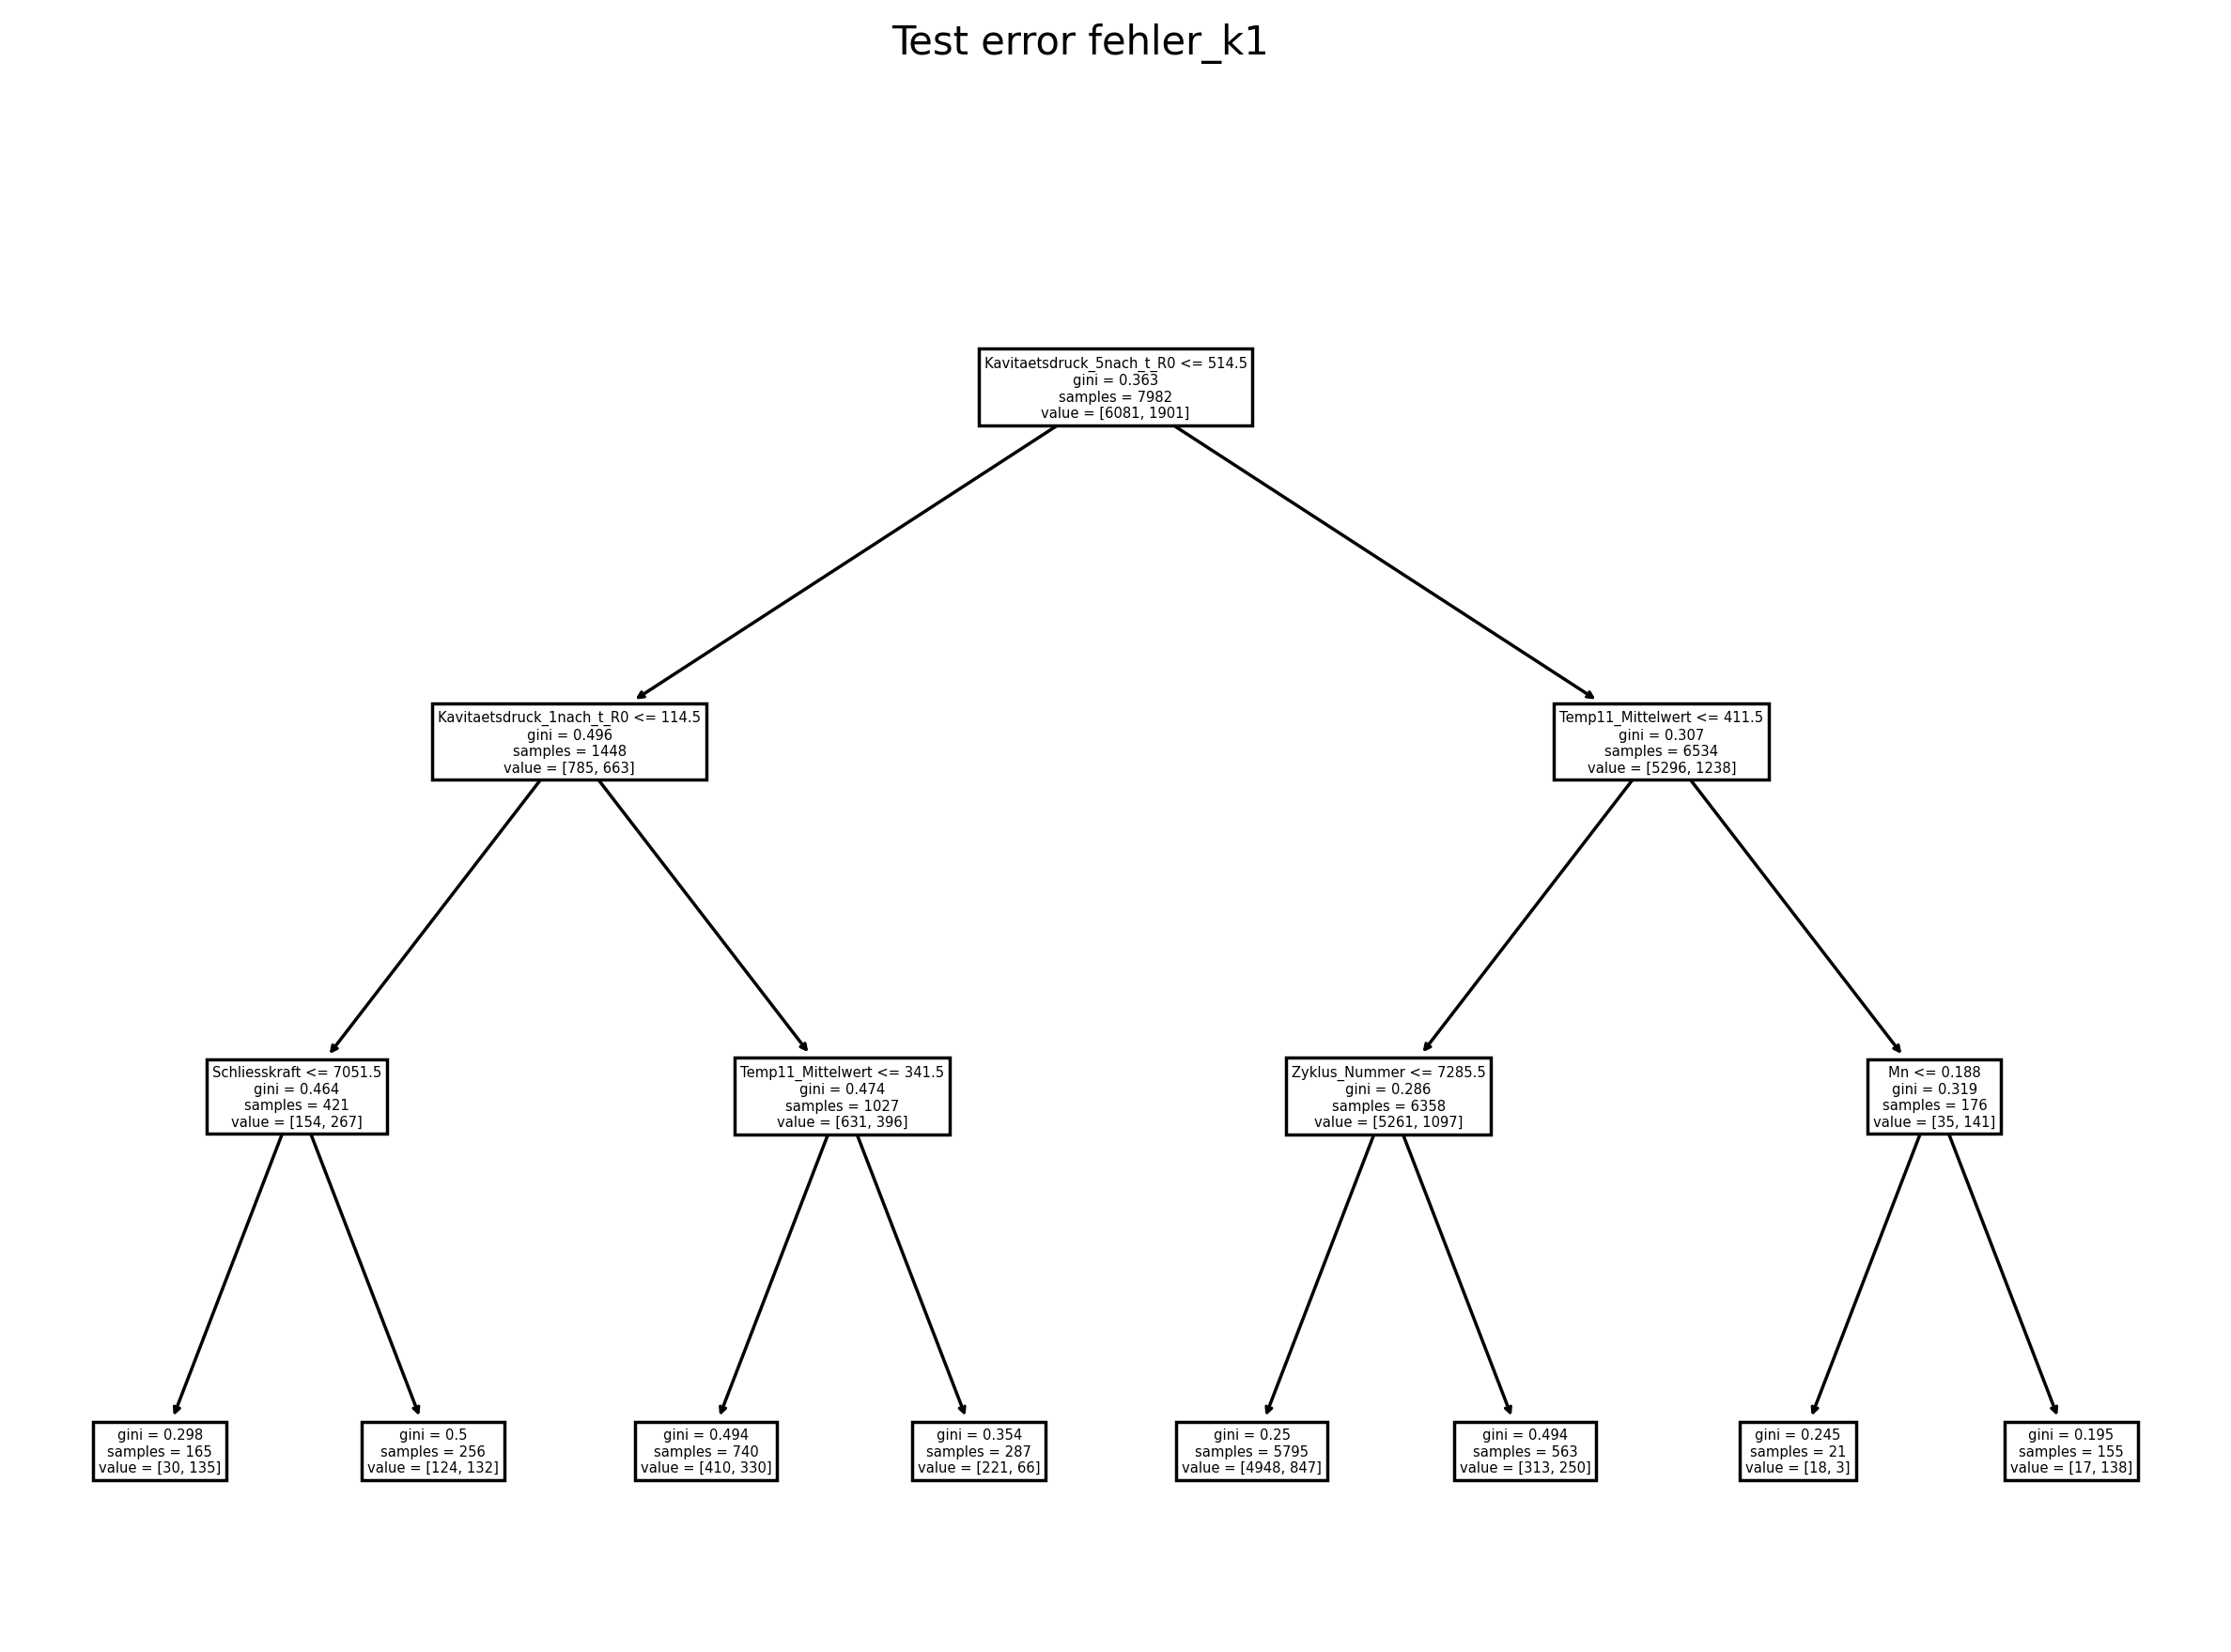

In [15]:
fig=plt.figure(figsize=(12,8), dpi=250, facecolor='w', edgecolor='k')
bue_data = pd.read_csv(PATH_DICT["bue"], decimal=".", sep='\t', header=0)
error_general = bue_data.iloc[:, -8:-7]
error_specific = bue_data.iloc[:, -7:]
features = bue_data.iloc[:, :-8]
specific_error_index = 0
specific_error_name = str(error_specific.columns[specific_error_index])
error_classes = ["No Error", specific_error_name]
Xp = Xp_all.iloc[:, pair]
X = np.array(features)
Y = np.array(error_specific.iloc[:, specific_error_index])
Y_labels = pd.array(error_classes)
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X, Y)
plt.suptitle("Test error " + specific_error_name)
tree.plot_tree(clf, feature_names=features.columns, class_names=error_classes)
